In [1]:
import glob

from pathlib import Path
from tqdm import tqdm

import annotation_utils
import data as data_class

/home/ltindall/.pyenv/versions/3.10.9/envs/rfml-dev/lib/python3.10/site-packages/cupyx/jit/_interface.py:173: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')


In [2]:
data_globs = {
    # "mini2_video": [
    #     "data/gamutrf/gamutrf-arl/01_30_23/mini2_iq_label/*.sigmf-meta",
    # ],
    "mini2_video": [
        "data/gamutrf/gamutrf-birdseye-field-days/pdx_field_day_2022_05_26/test_iq_label/dji-mini2-150m-0deg-5735mhz-lp-50-gain_20p5Msps_craft_flying-1.raw.sigmf-meta",
    ]
}

  0%|                                                                                                                                                                                                                                                                 | 0/1 [00:00<?, ?it/s]/home/ltindall/.pyenv/versions/3.10.9/envs/rfml-dev/lib/python3.10/site-packages/sigmf/sigmffile.py:914: UserWarning: Compliant Dataset `data/gamutrf/gamutrf-birdseye-field-days/pdx_field_day_2022_05_26/test_iq_label/dji-mini2-150m-0deg-5735mhz-lp-50-gain_20p5Msps_craft_flying-1.raw.sigmf-data` exists but "core:dataset" is also defined; using `data/gamutrf/gamutrf-birdseye-field-days/pdx_field_day_2022_05_26/test_iq_label/dji-mini2-150m-0deg-5735mhz-lp-50-gain_20p5Msps_craft_flying-1.raw.sigmf-data`
  warnings.warn(f'Compliant Dataset `{compliant_data_fn}` exists but '



Loaded 
 Data file: data/gamutrf/gamutrf-birdseye-field-days/pdx_field_day_2022_05_26/test_iq_label/dji-mini2-150m-0deg-5735mhz-lp-50-gain_20p5Msps_craft_flying-1.raw.sigmf-data 
 SigMF-Meta file: data/gamutrf/gamutrf-birdseye-field-days/pdx_field_day_2022_05_26/test_iq_label/dji-mini2-150m-0deg-5735mhz-lp-50-gain_20p5Msps_craft_flying-1.raw.sigmf-meta

Resetting annotations in data/gamutrf/gamutrf-birdseye-field-days/pdx_field_day_2022_05_26/test_iq_label/dji-mini2-150m-0deg-5735mhz-lp-50-gain_20p5Msps_craft_flying-1.raw.sigmf-meta

Loaded 
 Data file: data/gamutrf/gamutrf-birdseye-field-days/pdx_field_day_2022_05_26/test_iq_label/dji-mini2-150m-0deg-5735mhz-lp-50-gain_20p5Msps_craft_flying-1.raw.sigmf-data 
 SigMF-Meta file: data/gamutrf/gamutrf-birdseye-field-days/pdx_field_day_2022_05_26/test_iq_label/dji-mini2-150m-0deg-5735mhz-lp-50-gain_20p5Msps_craft_flying-1.raw.sigmf-meta

np.max(avg_pwr_db)=-42.39579852720838
np.mean(avg_pwr_db)=-53.775378227645795
median absolute deviation

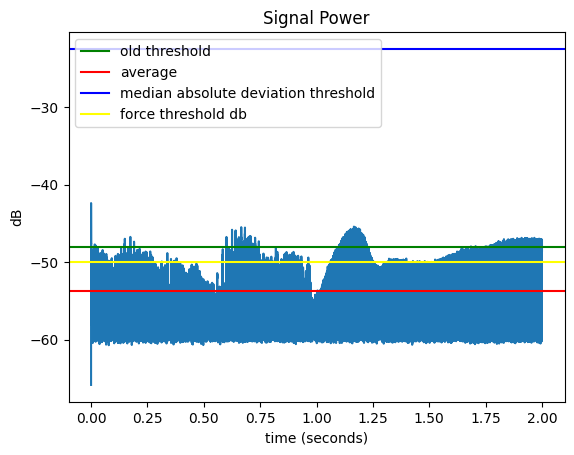


 15%|███████████████████████████████████▍                                                                                                                                                                                                            | 31982/216376 [07:05<31:09, 98.65it/s]

In [ ]:
for label in data_globs:
    for data_glob in data_globs[label]:
        for f in tqdm(glob.glob(str(Path(data_glob)))):
            # annotation_utils.annotate(f, label=label, avg_window_len=256, avg_duration=0.25, debug=True, estimate_frequency=True, spectral_energy_threshold=0.99, force_threshold_db=-40)

            data_obj = data_class.Data(f)
            annotation_utils.reset_annotations(data_obj)
            annotation_utils.annotate(f, label="mini2_video", avg_window_len=256, avg_duration=2, debug=True, estimate_frequency=True, spectral_energy_threshold=0.99, force_threshold_db=-50, overwrite=False, min_bandwidth=10e6)
            annotation_utils.annotate(f, label="mini2_telem", avg_window_len=256, avg_duration=2, debug=True, estimate_frequency=True, spectral_energy_threshold=0.99, force_threshold_db=-50, overwrite=False, max_bandwidth=5e6)
            